# Comparison with data

In this second notebook we will compare the results of the `cloudy-maraston` model with SDSS and JWST data!

First let's import the relevant modules, including `synthesizer`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from synthesizer.grid import Grid
from astropy.io import fits
import seaborn as sns
from matplotlib.lines import Line2D
import cmasher as cmr 
import pandas as pd

# and set up plotting 

plt.rcParams['figure.dpi'] = 200
mpl.rcParams.update({'font.size': 12})
cmap = cmr.bubblegum

Now load the grid with fixed (rather than reference) ionization parameters so we can compare difference ionisation parameter models with the data

In [2]:
grid_dir = '../grids'

grid_name = 'maraston13_kroupa-max_age:1e+07_cloudy-c23.01-sps-fixed-ionisation_parameter'
grid_u = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

grid_name = 'maraston13_kroupa-max_age:1e+07_cloudy-c23.01-sps-fixed-hydrogen_density'
grid_n = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

## Plot Figure 10: the O32, N2 and R23 diagnostic diagrams

Make lists of line ratios from JWST from Trump+22, Birkin+23, Sanders+24, Laseter+24, Welch+24a, Welch+24b, Rogers+24:

In [9]:
# O32, Trump 2022
o3 = np.array([24.2, 62.9, 70.6, 57.4])
o2 = np.array([2.1, 5.2, 17.2, 4.2])
o32_trump = o3/o2
o32_trump_x = [7.49, 7.87, 8.10, 7.75] #ID 4590, 5144, 6355, 10612

# O32, Sanders 2024
o3 = np.array([71.3, 10.61, 109.7, 87.84, 11.46, 37.91, 19.80, 73.15, 26.69, 182.90, 22.37, 30.81, 159.30, 267.8, 28.32])
o2 = np.array([3.93, 1.18, 3.17, 5.35, 2.04, 4.08, 1.78, 11.68, 3.93, 40.55, 1.14, 1.58, 44.25, 75.80, 0.87])
o32_sanders = o3/o2
o32_sanders_x = [7.78, 7.82, 7.62, 8.04, 7.48, 7.98, 7.48, 7.72, 7.95, 8.27, 7.88, 7.46, 8.33, 8.23, 7.12] #no 1651

# O32, Laseter 2024
o3 = np.array([92.23, 459.83, 1837.91, 918.3, 574.78, 497.98, 5404.32, 222.14, 275.35, 209.70, 23.34, 19.00, 661.64])
o2 = np.array([2.24, 11.19, 213.47, 33.5, 33.64, 10.40, 995.65, 6.18, 27.10, 32.78, 0.31, 1.59, 81.96])
o32_laseter = o3/o2
o32_laseter_x = [7.03, 7.23, 8.14, 7.77, 7.58, 7.54, 7.73, 8.04, 7.34, 7.28, 7.41, 7.78, 7.27] 

# O32, Welch 2024b
o3 = np.array([6.8])
o2 = np.array([0.22])
o32_welch_b = o3/o2
o32_welch_b_x = [7.97]

# N2, Welch 2024a
n2_welch_a = [0.113]
n2_welch_a_x = [7.97]

# N2, Birkin 2023
n2_birkin = [0.34, 0.53]
n2_birkin_x = [8.53, 8.55]

# N2, Sanders 2024
NII = np.array([0.93, 3.14, 0.52, 9.44, 8.59, 9.24])
Ha = np.array([16.43, 39.27, 9.78, 96.92, 103.60, 145.10])
n2_sanders = NII/Ha
# IDs 397, 1477, 1746, 1665, 11088, 3788
n2_sanders_x = [7.98, 7.72, 7.95, 8.27, 8.33, 8.23]

# N2, Welch 2024b
n2 = np.array([0.113])
Ha = np.array([3.0])
n2_welch_b = n2 / Ha
n2_welch_b_x = [7.97]

# N2, Rogers 2024
n2 = np.array([0.112])
Ha = np.array([3.051])
n2_rogers = n2 / Ha
n2_rogers_x = [8.07]

# R23, Trump 2022
o3_1 = np.array([24.2, 62.9, 70.6, 57.4]) # 5008
o3_2 = np.array([11.2, 31.9, 36.0, 29.9]) # 4960
o2 = np.array([2.1, 5.2, 17.2, 4.2])
Hb = np.array([14.1, 20.5, 19.0, 17.5])
r23_trump = (o3_1 + o3_2 + o2) / Hb
r23_trump_x = [7.49, 7.87, 8.10, 7.75] #ID 4590, 5144, 6355, 10612

# R23, Sanders 2024
o3_1 = np.array([71.3, 10.61, 109.7, 87.84, 11.46, 37.91, 19.80, 73.15, 26.69, 182.90, 22.37, 30.81, 159.30, 267.8, 28.32]) # 5008
o3_2 = np.array([23, 3.39, 36.32, 28.22, 3.78, 11.46, 7.48, 25.98, 7.90, 59.30, 6.10, 12.53, 53.71, 89.17, 10.61])
o2 = np.array([3.93, 1.18, 3.17, 5.35, 2.04, 4.08, 1.78, 11.68, 3.93, 40.55, 1.14, 1.58, 44.25, 75.80, 0.87])
Hb = np.array([10.17, 1.52, 17, 12.85, 1.33, 5.59, 2.79, 11.64, 3.51, 26.79, 2.15, 6.03, 26.32, 39.25, 8.32])
r23_sanders = (o3_1 + o3_2 + o2) / Hb
r23_sanders_x = [7.78, 7.82, 7.62, 8.04, 7.48, 7.98, 7.48, 7.72, 7.95, 8.27, 7.88, 7.46, 8.33, 8.23, 7.12] #no 1651

# R23, Laseter 2024
o3_1 = np.array([92.23, 459.83, 1837.91, 918.3, 574.78, 497.98, 5404.32, 222.14, 275.35, 209.70, 23.34, 19.00, 661.64])
o3_2 = np.array([30.61, 154.04, 615.7, 307.63, 192.81, 165.64, 1839.14, 72.93, 91.79, 69.48, 7.56, 6.10, 222.43])
o2 = np.array([2.24, 11.19, 213.47, 33.5, 33.64, 10.40, 995.65, 6.18, 27.10, 32.78, 0.31, 1.59, 81.96])
Hb = np.array([25.29, 134.23, 238.72, 137.56, 97.98, 90.96, 796.33, 31.85, 53.20, 38.80, 3.84, 4.13, 214.04])
r23_laseter = (o3_1 + o3_2 + o2) / Hb
r23_laserer_x = [7.03, 7.23, 8.14, 7.77, 7.58, 7.54, 7.73, 8.04, 7.34, 7.28, 7.41, 7.78, 7.27] 

# R23, Welch 2024b
o3_1 = np.array([6.8])
o3_2 = np.array([2.2])
o2 = np.array([0.28])
r23_welch_b = o3_1 + o3_2 + o2
r23_welch_b_x = [7.97]

laseter_color = '#ffd400'
trump_color = '#fe7e0f'
sanders_color = '#1e90ff'
welch_color = '#c08e00'
birkin_color = '#ff0000'
welch_b_color = '#654321'
rogers_color = '#ff00db'

Then loop over the lines and different ionisation parameters and hydrogen densities and plot!

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
Axes(0.125,0.653529;0.344444x0.226471)
-
Axes(0.125,0.653529;0.344444x0.226471)
--
Axes(0.125,0.653529;0.344444x0.226471)
-.
Axes(0.125,0.653529;0.344444x0.226471)
:
Axes(0.125,0.381765;0.344444x0.226471)
-
Axes(0.125,0.381765;0.344444x0.226471)
--
Axes(0.125,0.381765;0.344444x0.226471)
-.
Axes(0.125,0.381765;0.344444x0.226471)
:
Axes(0.125,0.11;0.344444x0.226471)
-
Axes(0.125,0.11;0.344444x0.226471)
--
Axes(0.125,0.11;0.344444x0.226471)
-.
Axes(0.125,0.11;0.344444x0.226471)
:


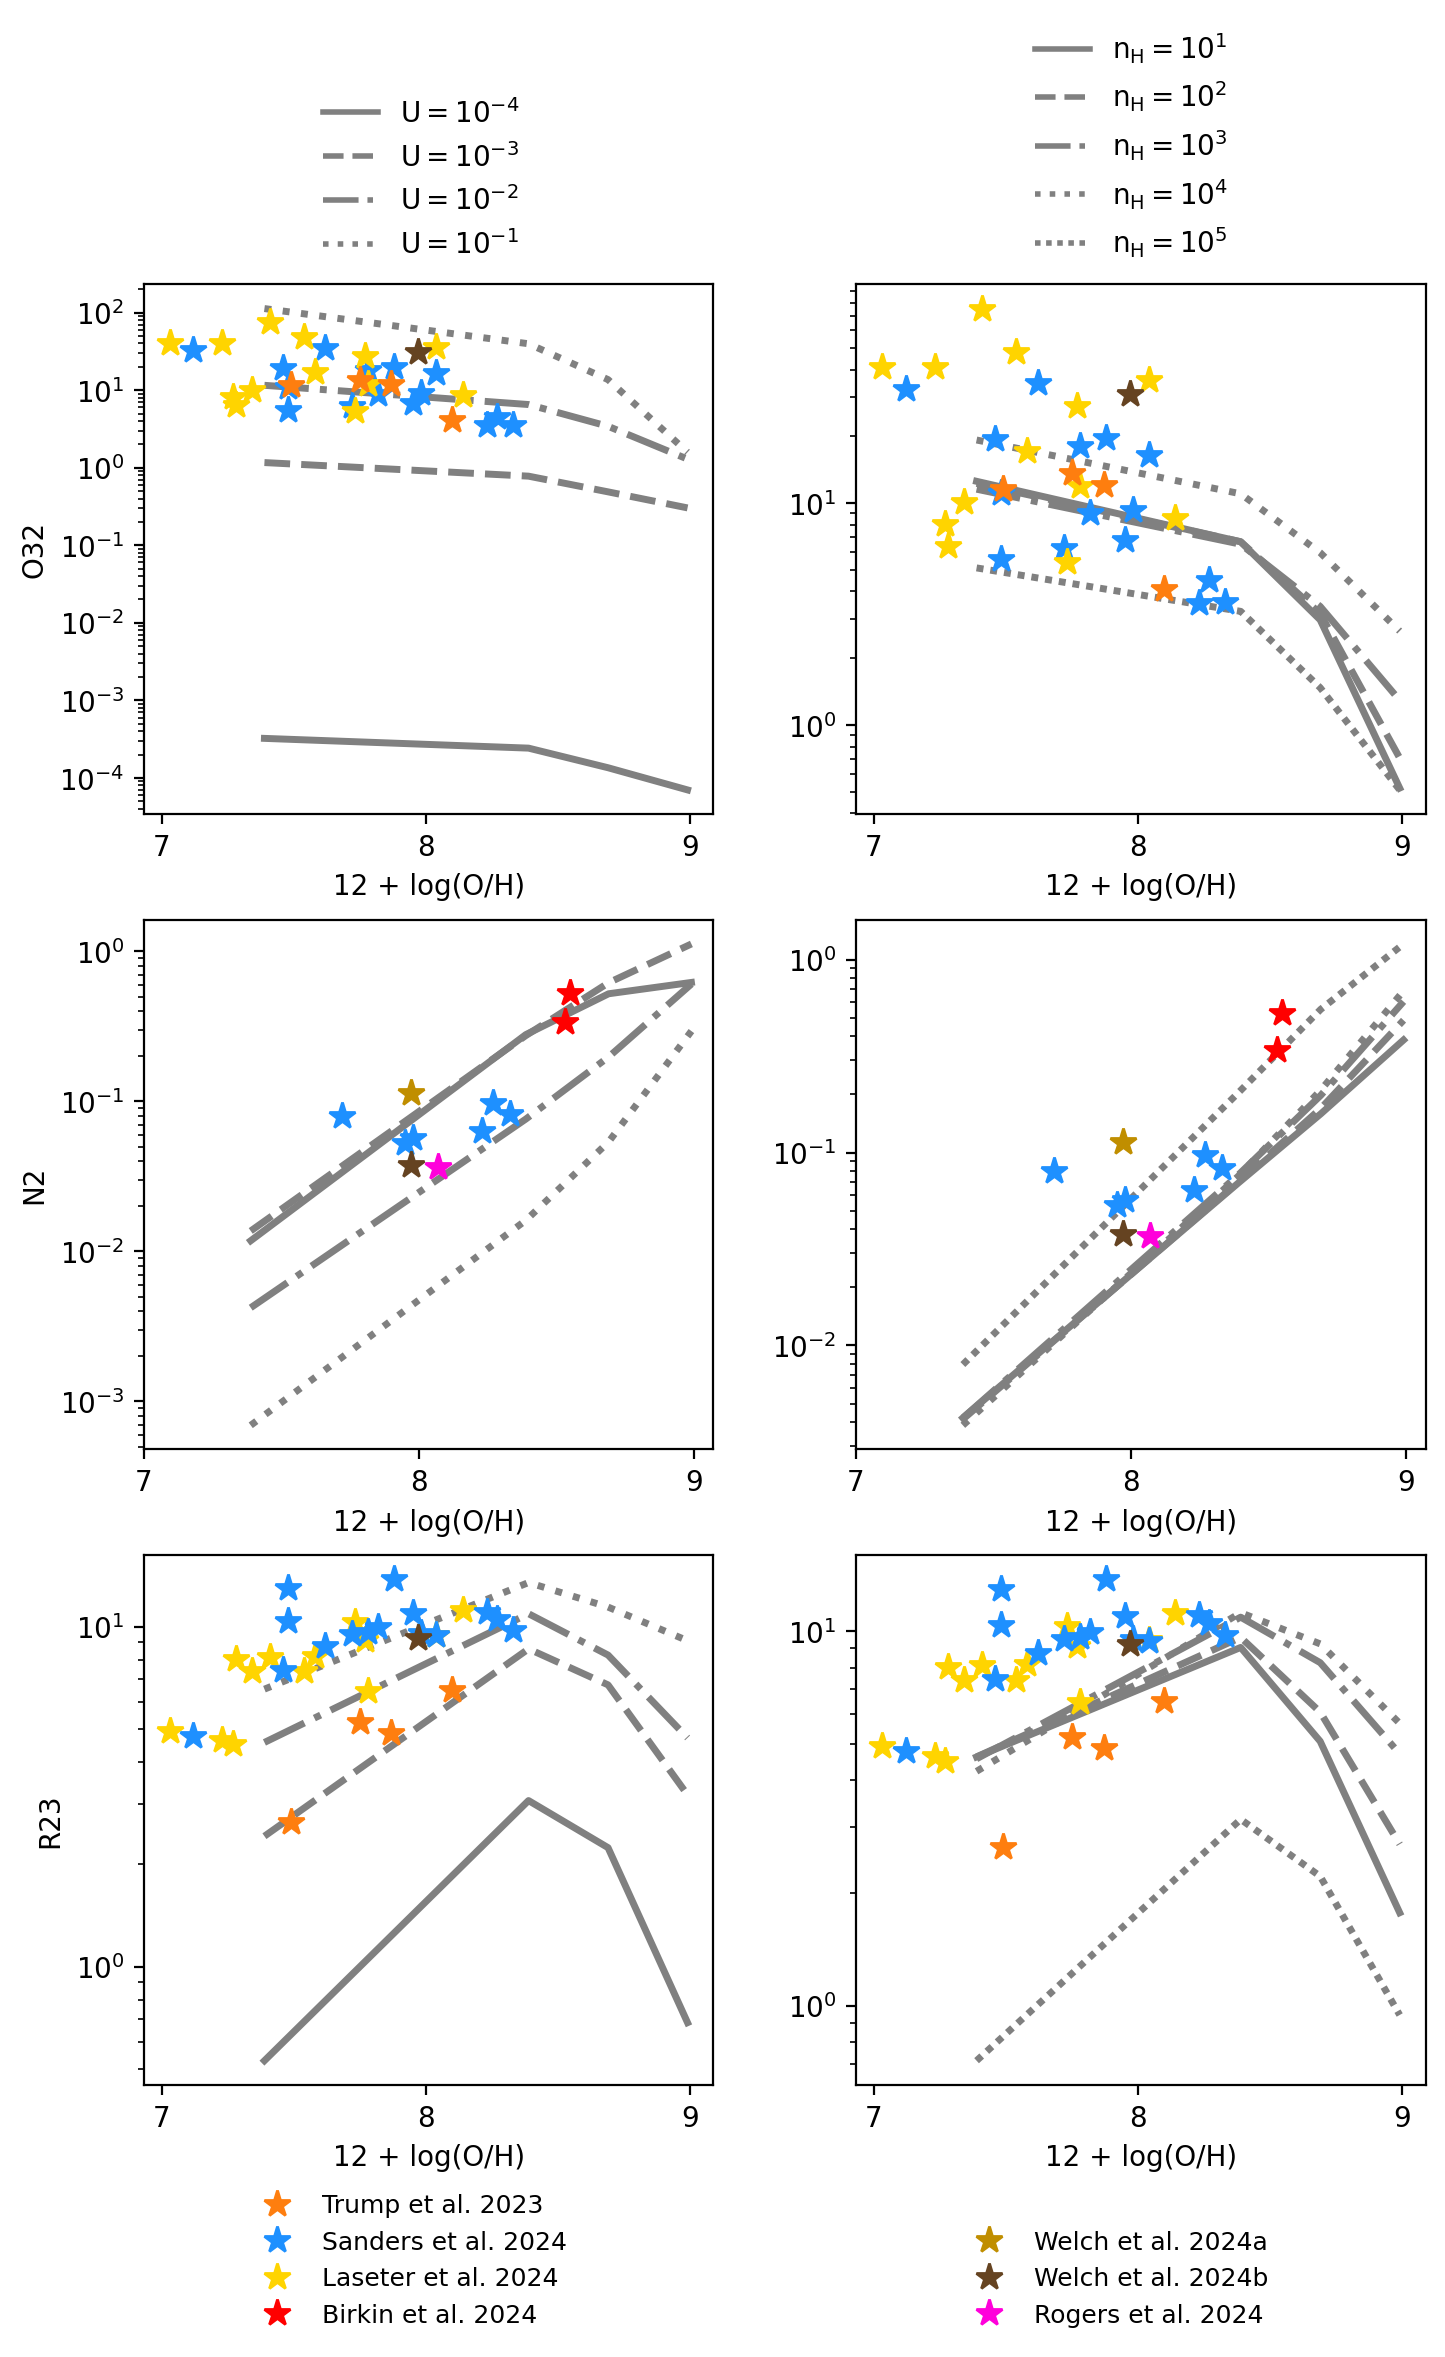

In [10]:
mpl.rcParams.update({'font.size': 10})

fig, axes = plt.subplots(3, 2, figsize=(8.27, 11.69), sharey=False)  # 1 row, 5 columns
plt.subplots_adjust(wspace=0.25)  # Increased the separation between subplots

ratio_ids = ['O32', 'N2', 'R23']

# different line style for each ionisation parameter
line_styles_u = {0.0001: '-',
               0.001: '--',
               0.01: '-.',
               0.1: ':'}

# different line style for each hydrogen density
line_styles_n = {1e1: '-',
               1e2: '--',
               1e3: '-.',
               1e4: ':',
               1e5: (0, (1,1))}

age = 1e6

print(grid_u.ionisation_parameter)

# 3 rows for each ratio id

# column 1: use grid_u and line_styles_u

# column 2: use grid_n and line_styles_n

for i, ratio_id in enumerate(ratio_ids):

    for iU, U in enumerate([1e-4,1e-3,1e-2,1e-1]): 

        ratios = []
        for Z in grid_u.metallicities :
            grid_point = grid_u.get_grid_point((age,Z, U))
            lines = grid_u.get_lines(grid_point)
            ratios.append(lines.get_ratio(ratio_id))

        Zsun = np.log10(grid_u.metallicities/0.02) + 8.69
        axes[i,0].plot(Zsun, ratios, color='grey', ls=line_styles_u[U], lw=2.5, label=f'U = {U}')

    for iN, N in enumerate(grid_n.hydrogen_density):

        ratios = []
        for Z in grid_n.metallicities :
            grid_point = grid_n.get_grid_point((age,Z, N))
            lines = grid_n.get_lines(grid_point)
            ratios.append(lines.get_ratio(ratio_id))

        Zsun = np.log10(grid_n.metallicities/0.02) + 8.69
        axes[i,1].plot(Zsun, ratios, color='grey', ls=line_styles_n[N], lw=2.5, label=fr'$\rm $n_H = {N}$')           

    # Plot JWST data
    if ratio_id == 'O32':
        axes[i,0].plot(o32_sanders_x, o32_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        axes[i,1].plot(o32_sanders_x, o32_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        axes[i,0].plot(o32_laseter_x, o32_laseter, ls='None', marker='*', label='Laseter et al. 2024', color=laseter_color, markersize='10')
        axes[i,1].plot(o32_laseter_x, o32_laseter, ls='None', marker='*', label='Laseter et al. 2024', color=laseter_color, markersize='10')
        axes[i,0].plot(o32_trump_x, o32_trump, ls='None', marker='*', label='Trump et al. 2023', color=trump_color, markersize='10')
        axes[i,1].plot(o32_trump_x, o32_trump, ls='None', marker='*', label='Trump et al. 2023', color=trump_color, markersize='10')
        axes[i,0].plot(o32_welch_b_x, o32_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        axes[i,1].plot(o32_welch_b_x, o32_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        axes[i,0].set_ylabel('O32')

    if ratio_id == 'N2':
        axes[i,0].plot(n2_welch_a_x, n2_welch_a, ls='None', marker='*', label='Welch et al. 2024a', color=welch_color, markersize='10')
        axes[i,1].plot(n2_welch_a_x, n2_welch_a, ls='None', marker='*', label='Welch et al. 2024a', color=welch_color, markersize='10')
        axes[i,0].plot(n2_birkin_x, n2_birkin, ls='None', marker='*', label='Birkin et al. 2024', color=birkin_color, markersize='10')
        axes[i,1].plot(n2_birkin_x, n2_birkin, ls='None', marker='*', label='Birkin et al. 2024', color=birkin_color, markersize='10')
        axes[i,0].plot(n2_sanders_x, n2_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        axes[i,1].plot(n2_sanders_x, n2_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        axes[i,0].plot(n2_welch_b_x, n2_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        axes[i,1].plot(n2_welch_b_x, n2_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        axes[i,0].plot(n2_rogers_x, n2_rogers, ls='None', marker='*', label='Rogers et al. 2024', color=rogers_color, markersize='10')
        axes[i,1].plot(n2_rogers_x, n2_rogers, ls='None', marker='*', label='Rogers et al. 2024', color=rogers_color, markersize='10')
        axes[i,0].set_ylabel('N2')

    if ratio_id == 'R23':
        axes[i,0].plot(r23_laserer_x, r23_laseter, ls='None', marker='*', label='Laseter et al. 2024', color=laseter_color, markersize='10')
        axes[i,1].plot(r23_laserer_x, r23_laseter, ls='None', marker='*', label='Laseter et al. 2024', color=laseter_color, markersize='10')
        axes[i,0].plot(r23_sanders_x, r23_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        axes[i,1].plot(r23_sanders_x, r23_sanders, ls='None', marker='*', label='Sanders et al. 2024', color=sanders_color, markersize='10')
        axes[i,0].plot(r23_trump_x, r23_trump, ls='None', marker='*', label='Trump et al. 2023', color=trump_color, markersize='10')
        axes[i,1].plot(r23_trump_x, r23_trump, ls='None', marker='*', label='Trump et al. 2023', color=trump_color, markersize='10')
        axes[i,0].plot(r23_welch_b_x, r23_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        axes[i,1].plot(r23_welch_b_x, r23_welch_b, ls='None', marker='*', label='Welch et al. 2024b', color=welch_b_color, markersize='10')
        axes[i,0].set_ylabel('R23')
    
    axes[i,0].set_yscale('log')
    axes[i,1].set_yscale('log')
    axes[i,0].set_xticks([7,8,9])
    axes[i,1].set_xticks([7,8,9])
    axes[i,0].set_xlabel(r'12 + log(O/H)')
    axes[i,1].set_xlabel(r'12 + log(O/H)')


# make U legend

legend_elements_u = [Line2D([0, 1], [0, 1], lw=2, linestyle='-', color='grey', label=r'$\rm U = 10^{-4}$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle='--', color='grey', label=r'$\rm U = 10^{-3}$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle='-.', color='grey', label=r'$\rm U = 10^{-2}$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle=':', color='grey', label=r'$\rm U = 10^{-1}$')
]

axes[0,0].legend(handles=legend_elements_u, prop={'size': 10}, loc='lower left', bbox_to_anchor=(0.27, 1), frameon=False)

# make n legend

legend_elements_n = [Line2D([0, 1], [0, 1], lw=2, linestyle='-', color='grey', label=r'$\rm n_H = 10^1$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle='--', color='grey', label=r'$\rm n_H = 10^2$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle='-.', color='grey', label=r'$\rm n_H = 10^3$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle=':', color='grey', label=r'$\rm n_H = 10^4$'),
                   Line2D([0, 1], [0, 1], lw=2, linestyle=(0, (1,1)), color='grey', label=r'$\rm n_H = 10^5$')
]

axes[0,1].legend(handles=legend_elements_n, prop={'size': 10}, loc='lower left', bbox_to_anchor=(0.27, 1), frameon=False)

# make JWST legend

legend_elements_jwst1 = [Line2D([0], [0], marker='*', markersize=10, color=trump_color, label='Trump et al. 2023', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=sanders_color, label='Sanders et al. 2024', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=laseter_color, label='Laseter et al. 2024', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=birkin_color, label='Birkin et al. 2024', linestyle='None'),
]

legend_elements_jwst2 = [Line2D([0], [0], marker='*', markersize=10, color=welch_color, label='Welch et al. 2024a', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=welch_b_color, label='Welch et al. 2024b', linestyle='None'),
                   Line2D([0], [0], marker='*', markersize=10, color=rogers_color, label='Rogers et al. 2024', linestyle='None')
]

axes[2,0].legend(handles=legend_elements_jwst1, prop={'size': 9}, loc='lower left', bbox_to_anchor=(0.15, -0.5), frameon=False)
axes[2,1].legend(handles=legend_elements_jwst2, prop={'size': 9}, loc='lower left', bbox_to_anchor=(0.15, -0.5), frameon=False)

## Figure 10: compare to SDSS and JADES data on the BPT diagram

Let's open the SDSS gal_info file and get the redshifts:

In [5]:
hdul = fits.open('../data/galSpecInfo-dr8.fits')

# Accessing the data from the table within the FITS file
data = hdul[1].data

subclass_all = data['subclass'] # includes empty values

# get indices for each element in subclass that is "STARFORMING"
starforming_indices = [idx for idx, value in enumerate(subclass_all) if value == "STARFORMING"]

z_all = data['z']

z = [z_all[i] for i in starforming_indices] 

print('min z:', min(n for n in z if n>0))
print('max z:', max(z))

hdul.close()

min z: 4.6841258e-05
max z: 0.39992908


Open the SDSS gal_line file, calculate the BPT ratios:

In [6]:
hdul = fits.open('../data/galSpecLine-dr8.fits')

# Accessing the data from the table within the FITS file
data = hdul[1].data

OIII_flux_all = data['OIII_5007_flux']
H_beta_flux_all = data['H_beta_flux']
NII_flux_all = data['NII_6584_flux']
H_alpha_flux_all = data['H_alpha_flux']

OIII_flux = np.array( [OIII_flux_all[i] for i in starforming_indices] )
H_beta_flux = np.array( [H_beta_flux_all[i] for i in starforming_indices] )
NII_flux = np.array( [NII_flux_all[i] for i in starforming_indices] )
H_alpha_flux = np.array( [H_alpha_flux_all[i] for i in starforming_indices] )

print('Total number of points in data set:', len(NII_flux))

hdul.close()

y_bpt_sdss = np.log10( OIII_flux / H_beta_flux )
x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )

# Identify indices where neither y_bpt nor x_bpt are NaN
valid_indices = ~np.isnan(y_bpt_sdss) & ~np.isnan(x_bpt_sdss)
y_bpt_clean = y_bpt_sdss[valid_indices]
x_bpt_clean = x_bpt_sdss[valid_indices]

print('Total number of BPT values:', len(y_bpt_clean), 'x', len(x_bpt_clean))


Total number of points in data set: 247423
Total number of BPT values: 246980 x 246980


/tmp/ipykernel_125954/2215893348.py:20: RuntimeWarning: invalid value encountered in divide
  y_bpt_sdss = np.log10( OIII_flux / H_beta_flux )
/tmp/ipykernel_125954/2215893348.py:20: RuntimeWarning: invalid value encountered in log10
  y_bpt_sdss = np.log10( OIII_flux / H_beta_flux )
/tmp/ipykernel_125954/2215893348.py:21: RuntimeWarning: divide by zero encountered in divide
  x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )
/tmp/ipykernel_125954/2215893348.py:21: RuntimeWarning: invalid value encountered in divide
  x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )
/tmp/ipykernel_125954/2215893348.py:21: RuntimeWarning: invalid value encountered in log10
  x_bpt_sdss = np.log10( NII_flux / H_alpha_flux )


Now get the JADES data:

In [7]:
def extract_flux_data(file_path, valid_flags):
    # Open the FITS file
    hdul = fits.open(file_path)
    data = hdul[1].data

    # Extract necessary columns
    z = data['z_Spec']
    z_flag = data['z_Spec_flag']

    # Filter z values based on flags
    filtered_z_field = z[np.isin(z_flag, valid_flags)]

    # Extract and filter flux values based on flags
    O3_5007_flux_field = data['O3_5007_flux'][np.isin(z_flag, valid_flags)]
    HB_4861_flux_field = data['HB_4861_flux'][np.isin(z_flag, valid_flags)]
    N2_6584_flux_field = data['N2_6584_flux'][np.isin(z_flag, valid_flags)]
    HA_6563_flux_field= data['HA_6563_flux'][np.isin(z_flag, valid_flags)]

    hdul.close()

    return filtered_z_field, O3_5007_flux_field, HB_4861_flux_field, N2_6584_flux_field, HA_6563_flux_field

# Define the file paths
gs_file_path = '/home/sophienewman/data_obs/jades/jades_dr3_medium_gratings_public_gs_v1.1.fits'
gn_file_path = '/home/sophienewman/data_obs/jades/jades_dr3_medium_gratings_public_gn_v1.1.fits'

# Define the valid flags
valid_flags = ['A', 'B']

# Extract data from both files
z_gs, O3_5007_flux_gs, HB_4861_flux_gs, N2_6584_flux_gs, HA_6563_flux_gs = extract_flux_data(gs_file_path, valid_flags)
z_gn, O3_5007_flux_gn, HB_4861_flux_gn, N2_6584_flux_gn, HA_6563_flux_gn = extract_flux_data(gn_file_path, valid_flags)

# Combine the data
z = np.concatenate((z_gs, z_gn))
print('Max z:', max(z))
O3_5007_flux = np.concatenate((O3_5007_flux_gs, O3_5007_flux_gn))
HB_4861_flux = np.concatenate((HB_4861_flux_gs, HB_4861_flux_gn))
N2_6584_flux = np.concatenate((N2_6584_flux_gs, N2_6584_flux_gn))
HA_6563_flux = np.concatenate((HA_6563_flux_gs, HA_6563_flux_gn))

print('Total number of 03 5007 measurements:', len(O3_5007_flux))

y_bpt_jades = np.log10( O3_5007_flux / HB_4861_flux )
x_bpt_jades = np.log10( N2_6584_flux / HA_6563_flux )

# Identify indices where neither y_bpt nor x_bpt are NaN
valid_indices = ~np.isnan(y_bpt_jades) & ~np.isnan(x_bpt_jades)
y_bpt_clean = y_bpt_jades[valid_indices]
x_bpt_clean = x_bpt_jades[valid_indices]

print('Total number of BPT points:', len(y_bpt_clean), 'x', len(x_bpt_clean))


Max z: 12.473683
Total number of 03 5007 measurements: 1849
Total number of BPT points: 150 x 150


Plot! (It might take a while!)

/home/sophienewman/miniconda3/envs/synth/lib/python3.10/site-packages/synthesizer/grid.py:780: FutureWarning: Line objects should be created with a string id, not a list or tuple. This will be removed in a future version.
  Line(


          age     Z      U         x         y
0   1000000.0  0.01  0.001 -0.561493  0.366112
1   1000000.0  0.01  0.010 -1.118043  0.829256
2   1000000.0  0.01  0.100 -1.792999  0.989574
3   1000000.0  0.02  0.001 -0.209112  0.124653
4   1000000.0  0.02  0.010 -0.703796  0.645884
5   1000000.0  0.02  0.100 -1.270295  0.891183
6   1000000.0  0.04  0.001  0.049354 -0.353732
7   1000000.0  0.04  0.010 -0.217781  0.239114
8   1000000.0  0.04  0.100 -0.531424  0.566865
9   3000000.0  0.01  0.001 -0.565475 -0.308912
10  3000000.0  0.01  0.010 -0.818664  0.351765
11  3000000.0  0.01  0.100 -1.245431  0.643198
12  3000000.0  0.02  0.001 -0.246322 -1.321534
13  3000000.0  0.02  0.010 -0.311002 -0.388209
14  3000000.0  0.02  0.100 -0.409419 -0.140730
15  3000000.0  0.04  0.001 -0.043728 -2.977832
16  3000000.0  0.04  0.010 -0.027739 -1.451531
17  3000000.0  0.04  0.100  0.034744 -1.335392
18  5000000.0  0.01  0.001 -0.561376 -1.796957
19  5000000.0  0.01  0.010 -0.584703 -0.648317
20  5000000.0

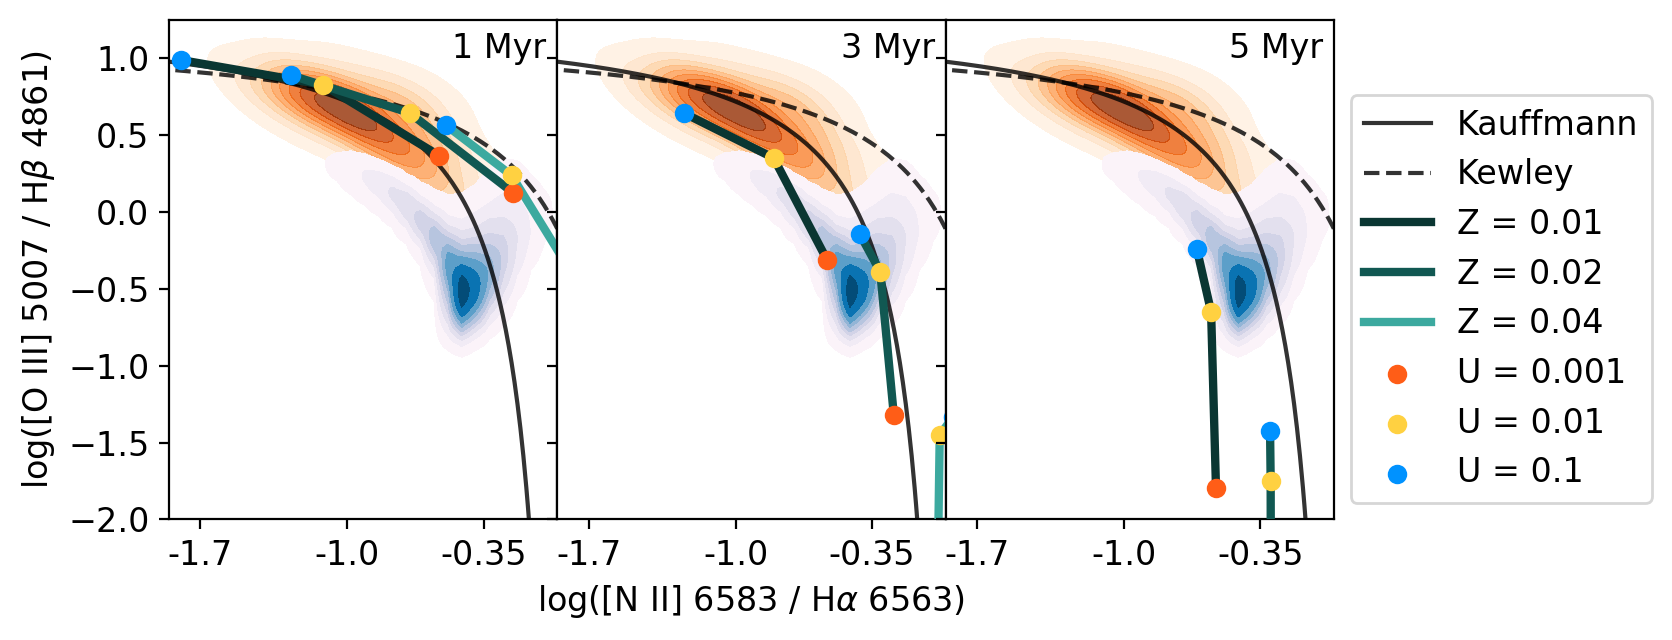

In [14]:
# plot kauffmann and kewley lines

kauffmann = []
kewley = []
xvalues = np.linspace(-3.5, 0, 500)
for xvalue in xvalues:
    kauffmann.append(0.61 / (xvalue - 0.05) + 1.3)
    kewley.append(0.61 / (xvalue - 0.47) + 1.19)

# Plot setup
color_maps = ["PuBu", "Oranges", "Greens"]
scatter_colors = ["#65b8f8", "#f9bc76", "#f37581"] # red , orange, blue
plot_labels = ['SDSS', 'JADES']

cmap = cmr.bubblegum
colors_Z = ['#0a3632', '#115852', '#3ca99f']
colors_U = ['#ff5d17', '#ffd141', '#0092ff']

# Normalize metallicity values for color mapping
norm = plt.Normalize(vmin=min(grid_u.metallicities), vmax=max(grid_u.metallicities))

ages_Myr = np.array([1, 3, 5])
ages = ages_Myr * 1e6

# Create a figure with dimensions (1, 5)
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

data = []

for ia, age in enumerate(ages):
    for iZ, Z in enumerate([0.01, 0.02, 0.04]):
        for iU, U in enumerate([0.001, 0.01, 0.1]):

            grid_point = grid_u.get_grid_point((age, Z, U))
            lines = grid_u.get_lines(grid_point)
            x_, y_ = lines.get_diagram('BPT-NII')
            data.append({'age': age, 'Z': Z, 'U': U, 'x': np.log10(x_), 'y': np.log10(y_)})

df = pd.DataFrame(data)
print(df)

# Plot for each age group on a different subplot
for ia, age in enumerate(ages):
    ax = axes[ia]
    
    # Plot Kauffmann and Kewley lines
    ax.plot(xvalues, kauffmann, alpha=0.8, color='black', ls='-', label='Kauffmann', zorder=2)
    ax.plot(xvalues, kewley, alpha=0.8, color='black', ls='--', label='Kewley', zorder=3)
    
    # Plot data
    sns.kdeplot(ax=ax, x=x_bpt_jades, y=y_bpt_jades, cmap=color_maps[1], fill=True, label=plot_labels[1], alpha=0.8, zorder=0)
    sns.kdeplot(ax=ax, x=x_bpt_sdss, y=y_bpt_sdss, cmap=color_maps[0], fill=True, label=plot_labels[0], zorder=1)
    
    # plot Z lines
    for iZ, Z in enumerate(df['Z'].unique()):
        subset = df[(df['Z'] == Z) & (df['age'] == age)] 
        #print(f'Plotting Z line for Z={Z}, data:\n{subset}')
        ax.plot(subset['x'], subset['y'], label=f'Z = {Z}', lw=3, color=colors_Z[iZ], zorder=4)
    
    # plot U points 
    for iU, U in enumerate(df['U'].unique()):
        subset = df[(df['U'] == U) & (df['age'] == age)]
        #print(f'Plotting U points for U={U}, data:\n{subset}')
        ax.scatter(subset['x'], subset['y'], label=f'U = {U}', color=colors_U[iU], zorder=5)
    
    ylabel = r'[O III] 5007 / H$\beta$ 4861'
    xlabel = r'[N II] 6583 / H$\alpha$ 6563'
    
    ax.set_ylim(bottom=-2, top=1.25)
    ax.set_xlim(left=-1.85, right=-0)

    tick_positions = [-1.7, -1.0, -0.35]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_positions)
    
    age_Myr = ages_Myr[ia]
    ax.text(x=-0.5, y=1, s=f'{age_Myr} Myr') #s=f'{age_Myr:.0f} Myr

axes[0].set_ylabel(f'log({ylabel})')
axes[1].set_xlabel(f'log({xlabel})')
axes[2].legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.tight_layout(pad=0)  # Set padding between subplots to zero
plt.subplots_adjust(wspace=0)



## The next notebook

In the next (and last) notebook we will compare the `cloudy-maraston` models with others that are available.